In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.linalg import svd, norm
from sklearn.decomposition import NMF, TruncatedSVD

## Decomposition SVD and dimension reduction

In [3]:
X = pd.read_csv('data/bars.csv', header=None).values
X_noise_20 = pd.read_csv('data/bars_noise20.csv', header=None).values
X_noise_50 = pd.read_csv('data/bars_noise50.csv', header=None).values

In [2]:
X.shape

NameError: name 'X' is not defined

In [ ]:
X[1]

In [6]:
X_noise_20[1]

array([  0,   0, 225,   0,   0,   0,  48,   0,  44,   0, 220,  70,   0,
        54,   0,  70,   6,   0, 186,   0,   0,   0,   0,  48,   8,   0,
       255,  15,   0,   0,  14,  60, 255, 173, 193, 225, 255, 169, 164,
       255,   0,  80, 166,  81,   0,   0,   8, 112, 255, 241, 255, 255,
       236, 255, 255, 255,   0,   0, 255,   1,   0,   6, 120,   5],
      dtype=int64)

In [15]:
def show_image(x):
    plt.imshow(x.reshape((8,8)), cmap='Greys')

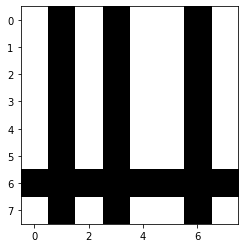

In [8]:
show_image(X[2])

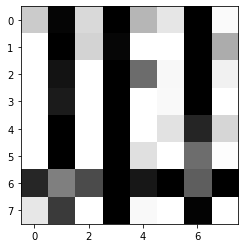

In [9]:
show_image(X_noise_20[2])

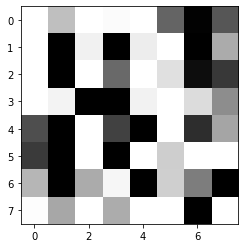

In [10]:
show_image(X_noise_50[2])

### SVD

In [11]:
U, s, V = svd(X, full_matrices=True)
U.shape, s.shape, V.shape

((10000, 10000), (64,), (64, 64))

In [12]:
s

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
s.shape

(64,)

In [14]:
V[:5, :]

array([[6.16400306e-177, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-30

In [15]:
S = np.zeros((X.shape))
S[:s.shape[0], :s.shape[0]] = np.diag(s)
S.shape

(10000, 64)

### Use only 5 main vectors (which means reduction to 5 dimensions). Create reconstructed matrix and compare it with original one

In [52]:
number = 5

In [53]:
R = U[:,:number].dot(np.diag(s[:number])).dot(V[:number,:])
R.shape

(10000, 64)

In [61]:
print(U.shape)
print(s.shape)
print(V.shape)

(10000, 10000)
(64,)
(64, 64)


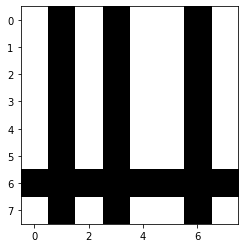

In [62]:
show_image(X[2])

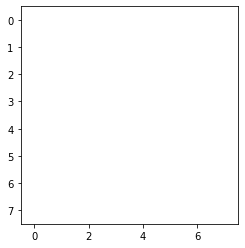

In [63]:
show_image(R[2])

In [64]:
R[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### What is the reconstruction error?

In [65]:
X[0]-R[0]

array([  0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 255.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0., 255.,
       255., 255., 255., 255., 255., 255., 255.,   0.,   0.,   0.,   0.,
         0., 255.,   0.,   0., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255.])

In [66]:
X-R

array([[  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0., 255., ...,   0.,   0.,   0.],
       [  0., 255.,   0., ...,   0., 255.,   0.],
       ...,
       [  0., 255., 255., ...,   0.,   0.,   0.],
       [255.,   0.,   0., ...,   0.,   0., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.]])

In [67]:
norm(X-R)

131202.39422358116

## Task 1(1p) : Complete following tasks for dimension reduction using SVD over our toy datasets (bars, bars_noise20, bars_noise50)

### Question: What does previous number mean? What is the output from *norm* function?

Answer:
- **Frobenius Norm** - is a sum of squared errors for each original-reconstructed pair
- the lower the result the better
- it describes how much is different from original one

### Find good number of features/dimension for our toy datasets
- **Try different number of dimensions for dimension reduction, calculate Frobenius norm for reconstructed and original matrix, create plot with results afterwards.**
- Repeat proces for datasets **X**, **X_noise_20**, **X_noise_50**


In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.linalg import svd, norm
from sklearn.decomposition import NMF, TruncatedSVD

In [2]:
X = pd.read_csv('data/bars.csv', header=None).values
X_noise_20 = pd.read_csv('data/bars_noise20.csv', header=None).values
X_noise_50 = pd.read_csv('data/bars_noise50.csv', header=None).values

In [3]:
def recunstruction(U, s, V, dim):
    return U[:,:dim].dot(np.diag(s[:dim])).dot(V[:dim,:])

In [4]:
def calculate_frobenius(ds, dimension, U, s, V):
    R = recunstruction(U, s, V, dimension)
    return norm(ds-R)

In [5]:
def run_calculations(ds, d_f, d_t):
    res = {}
    U, s, V = svd(ds, full_matrices=True)
    for i in range(d_f, d_t):
        res[i] = {
            'error': calculate_frobenius(ds, i, U, s, V),
            'dim': i
        }
        
    t_res = {}
    for v in res.values():
        for k, v1 in v.items():
            value = t_res.get(k, [])
            value.append(v1)
            t_res[k] = value
    return (pd.DataFrame.from_dict(t_res), (U, s, V))

In [6]:
ds = pd.read_csv('data/bars.csv', header=None).values

In [7]:
ds.shape

(10000, 64)

In [8]:
df, data = run_calculations(ds, 1, ds.shape[1])

<AxesSubplot:xlabel='dim', ylabel='error'>

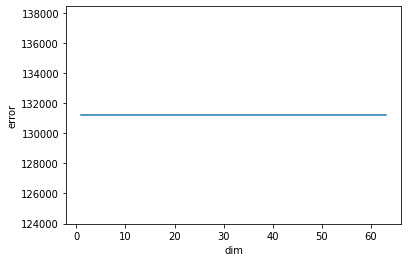

In [9]:
sns.lineplot(data=df, x='dim', y='error')

In [10]:
def run_for_ds(path, size=1):
    ds = pd.read_csv(path, header=None).values
    print(ds.shape)
    ds = ds[np.random.randint(ds.shape[0], size=int(ds.shape[0] * size)), :]
    print(ds.shape)
    df, svd = run_calculations(ds, 1, ds.shape[1])
    sns.lineplot(data=df, x='dim', y='error')
    return df, svd, ds

(10000, 64)
(1000, 64)


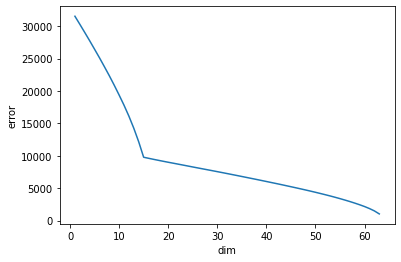

In [11]:
df_1, svd_1, ds_1 = run_for_ds('data/bars.csv', 0.1)

(10000, 64)
(1000, 64)


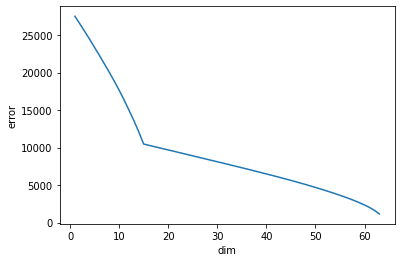

In [12]:
df_2, svd_2, ds_2 = run_for_ds('data/bars_noise20.csv', 0.1)

(10000, 64)
(1000, 64)


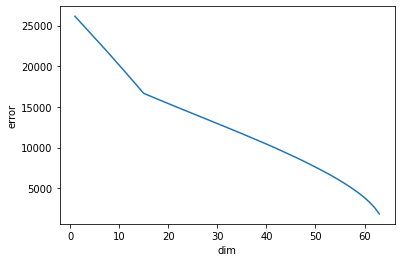

In [13]:
df_3, svd_3, ds_3 = run_for_ds('data/bars_noise50.csv', 0.1)

### Interpret results based on previous graphs. What is the best number of dimensions? Why? What kind of information our toy dataset have?

Interpretation:


- Z přechozích grafů lze pozorovat, že nejlepší počet dimenzí je kolem čísla 15. Důvodem je velice strmý posun směrem k nížší chybě. Od dimeze 15 pak dochází k pomalejšímu klesání chyby. Z toho můžeme predikovat, že ostatní features neposkytují již tak relevenatní informace.

- Prostor 8x8 lze zakódovat pouze do 16.


### Visualize some recond in form of 8x8 image from reconstructed matrix produced for best dimension reduction parameter.

In [83]:
import random

In [84]:
def show_image(x):
    return plt.imshow(x.reshape((8,8)), cmap='Greys')

In [96]:
def show_images(ds, svd, dim, number):
    U, s, V = svd
    r1 = recunstruction(U, s, V, dim)
    fig, axs = plt.subplots(number, 2, figsize=(30, 30))
    picks = random.sample(range(0, ds.shape[1]), 10)
    fig.suptitle("Original | Reconstructed")
    for i in range(number):
        pick_i = picks[i]
        axs[i][0].imshow(ds[pick_i].reshape((8,8)), cmap='Greys')
        axs[i][1].imshow(r1[pick_i].reshape((8,8)), cmap='Greys')

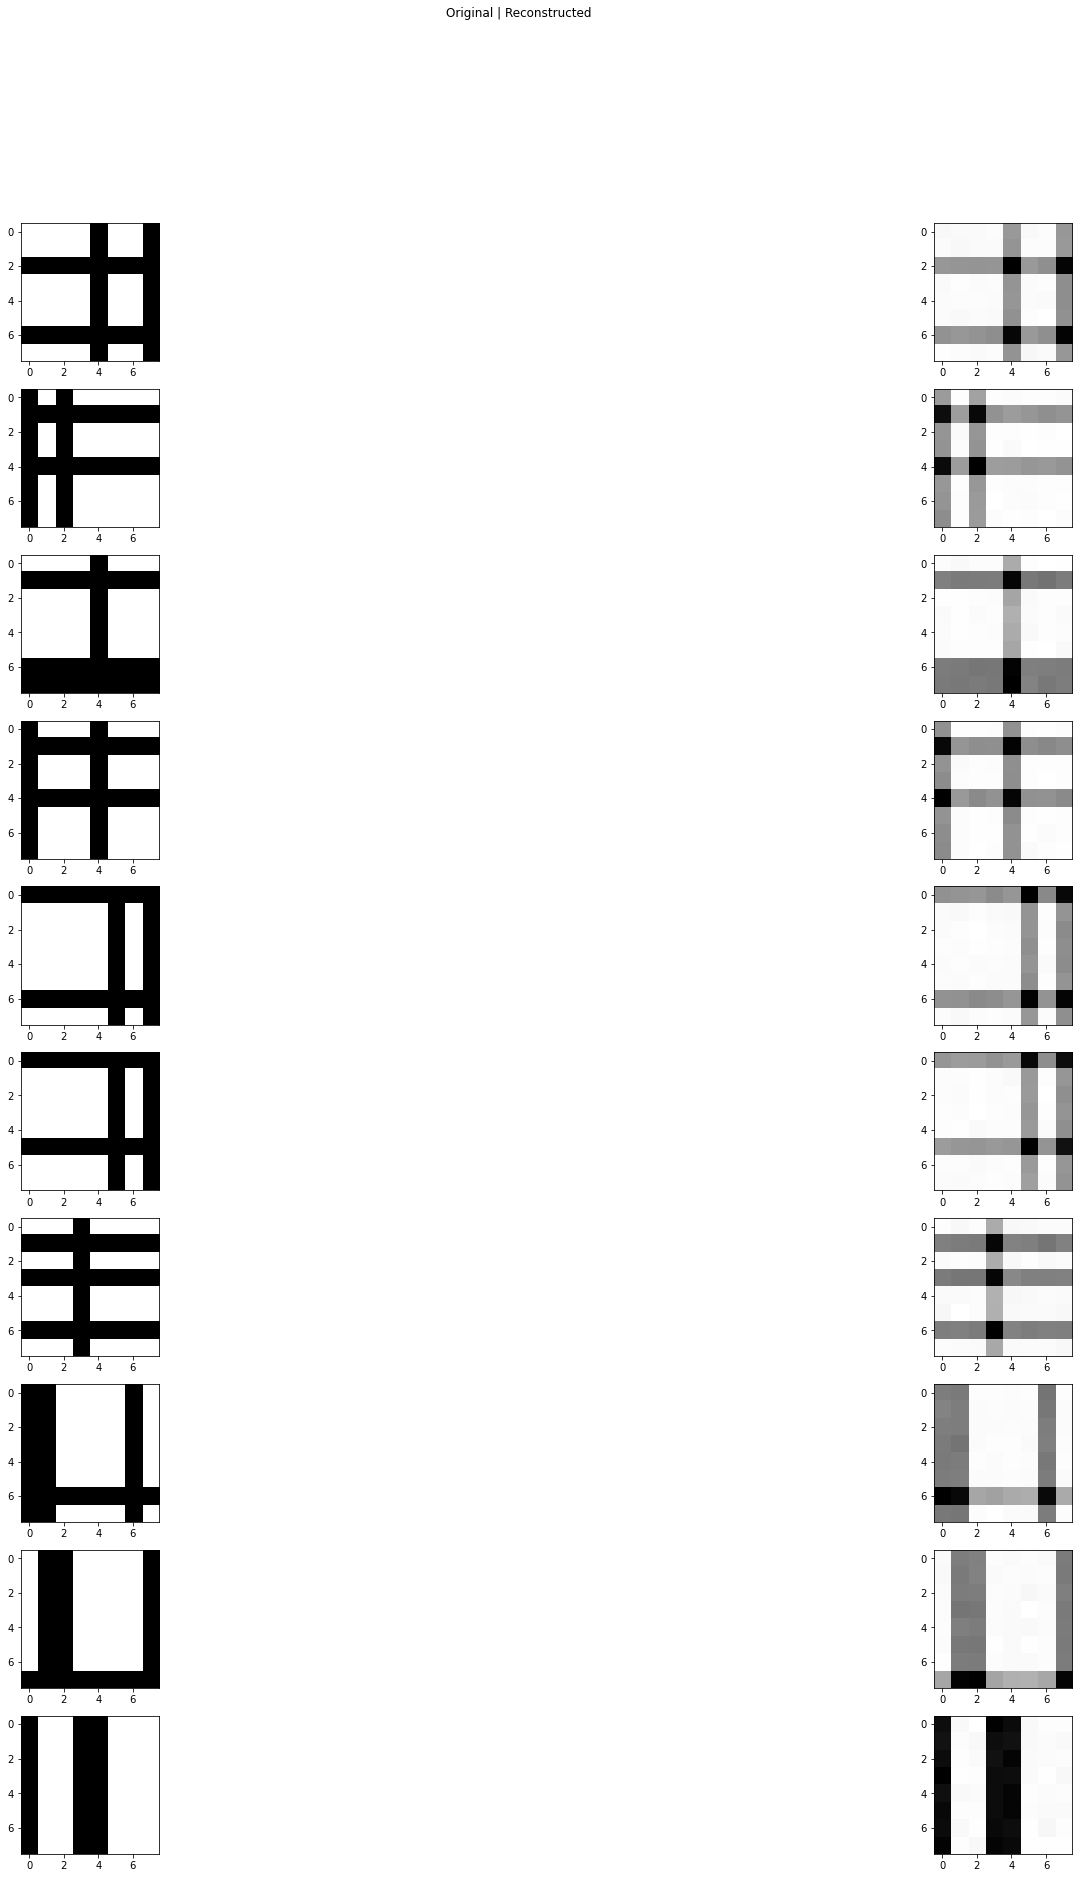

In [97]:
show_images(ds_1, svd_1, 15, 10)

## Task 2(1p) : Dimension reduction and visualization of clustering results

We have tried some clustering for **Titanic data** last week. I have copied the most important cells into this notebook.

1. Fill in any clustering method for our dataset **X**.
2. Lets use other dimension reduction technique: PCA and TSNE from sklearn library and get 2D space representation for our dataset **X**. 
3. Visualize results from previous step - create at least two scatter plots for data points and use cluster_id as color for data points.
4. If you want, you can try different clustering method, different parameters or different data preprocessing and visualize clustering result once again.

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [16]:
df = pd.read_csv('data/titanic.csv', index_col=0)
df_clustering = df[['Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()
df_clustering = df_clustering.dropna()

In [17]:
df_encoded = pd.DataFrame(index = df_clustering.index)
df_encoded['Sex'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df_clustering[['Sex']])
df_encoded = df_encoded.join(pd.get_dummies(df_clustering[['Embarked']]))
df_encoded['Fare'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['Fare']])
df_encoded['Age'] = sklearn.preprocessing.minmax_scale(df_clustering.Age)
df_encoded = df_encoded.join(df_clustering[['Survived', 'Pclass', 'SibSp', 'Parch']])
X = df_encoded.values

In [18]:
X

array([[1., 0., 0., ..., 3., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 3., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 3., 0., 0.]])

<AxesSubplot:xlabel='k'>

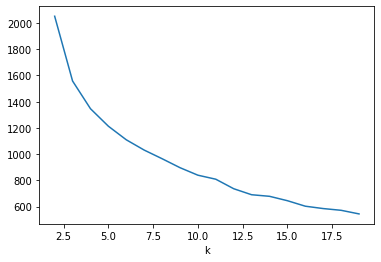

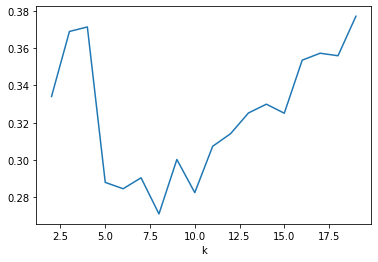

In [23]:
clustering_scores = []

for k in range(2, 20):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silh': sklearn.metrics.silhouette_score(X, clustering.labels_),
        'labels': clustering.labels_
    })
    
    
df_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns').set_index('k')

df_scores.sse.plot()
plt.figure()
df_scores.silh.plot()

In [24]:
df_scores

,sse,silh,labels
k,,,
2,2051.762020,0.334082,"[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, ..."
3,1557.654274,0.368920,"[1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, ..."
4,1346.322976,0.371333,"[0, 2, 0, 2, 0, 2, 1, 3, 2, 3, 2, 0, 3, 0, 0, ..."
5,1212.780975,0.288026,"[1, 0, 1, 0, 1, 0, 3, 2, 4, 4, 0, 1, 2, 1, 4, ..."
6,1109.187436,0.284632,"[1, 0, 1, 0, 1, 3, 2, 4, 0, 4, 3, 1, 5, 1, 3, ..."
7,1030.710679,0.290494,"[0, 2, 0, 1, 0, 3, 4, 6, 2, 6, 3, 0, 5, 0, 3, ..."
8,964.833502,0.271140,"[7, 4, 7, 6, 7, 6, 3, 5, 4, 0, 6, 7, 5, 7, 1, ..."
9,896.429438,0.300307,"[0, 3, 7, 5, 0, 1, 4, 2, 3, 2, 1, 0, 6, 0, 1, ..."
10,839.079829,0.282554,"[0, 9, 6, 9, 0, 1, 5, 3, 9, 3, 1, 0, 2, 0, 6, ..."


In [79]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [77]:
def task2(data, df_scores, k, instance):
    X_transformed = instance(n_components=2).fit_transform(X)
    
    df = pd.DataFrame(X_transformed)    
    df.columns = ['x', 'y']
    v = df_scores.loc[k]['labels']
    df['clusterId'] = v
    
    plt.figure(figsize=(15, 10))
    sns.scatterplot(data=df, x="x", y="y", hue='clusterId', palette='deep')
    
    return df

,x,y,clusterId
0,-1.169384,0.772470,0
1,1.804755,-0.982348,2
2,-1.169443,-0.015620,0
3,1.452648,-0.737880,2
4,-1.434995,0.079096,0
...,...,...,...
707,1.381630,2.170356,3
708,-0.623710,-0.518532,0
709,0.712007,-1.284363,2
710,0.742813,-1.494856,2


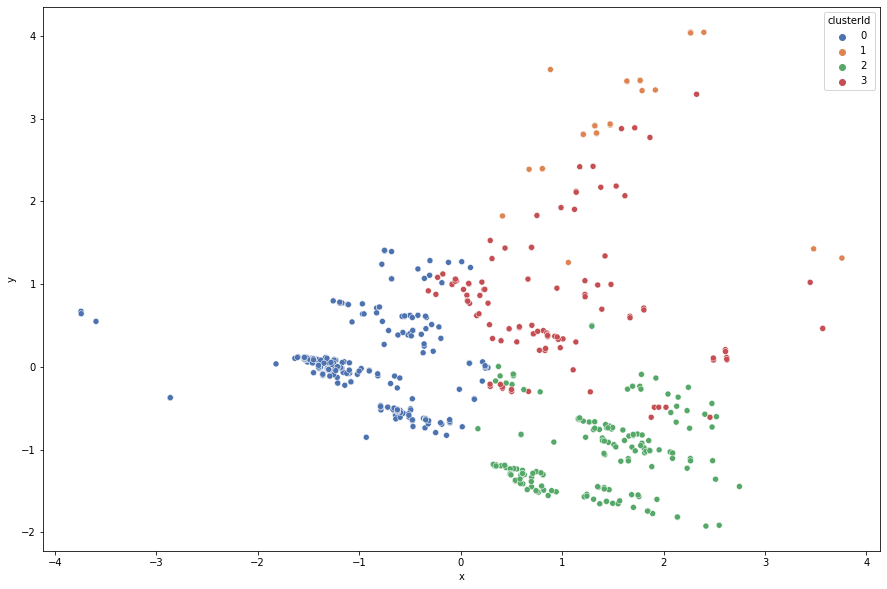

In [78]:
task2(X, df_scores, 4, PCA)

c:\users\proko\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\proko\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,x,y,clusterId
0,-3.175373,17.039881,0
1,33.338676,-5.249208,2
2,-13.222614,-5.456387,0
3,20.775509,-8.401084,2
4,-29.738071,7.329672,0
...,...,...,...
707,13.540645,9.366814,3
708,0.473747,-23.771923,0
709,24.493132,-13.888085,2
710,37.544079,-7.512148,2


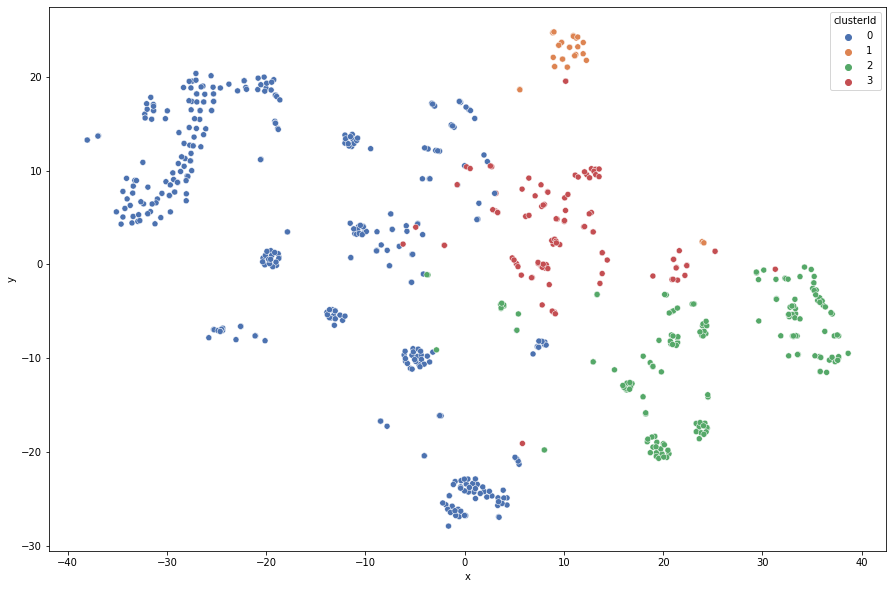

In [85]:
task2(X, df_scores, 4, TSNE)